In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var
from pyclouds.plotting import plot_hydrometeor_evolution

/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:162: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  warnings.warn("EoS calculation stored within microphysics, should really use something defined externally")
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:236: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_r = (pi*(qg*rho_l)/(qr*rho_g))**(1./4.)
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:253: RuntimeWarning: invalid value encountered in double_scalars
  r_c = (ql*rho/(4./3.*pi*self.N0*rho_l))**(1./3.)


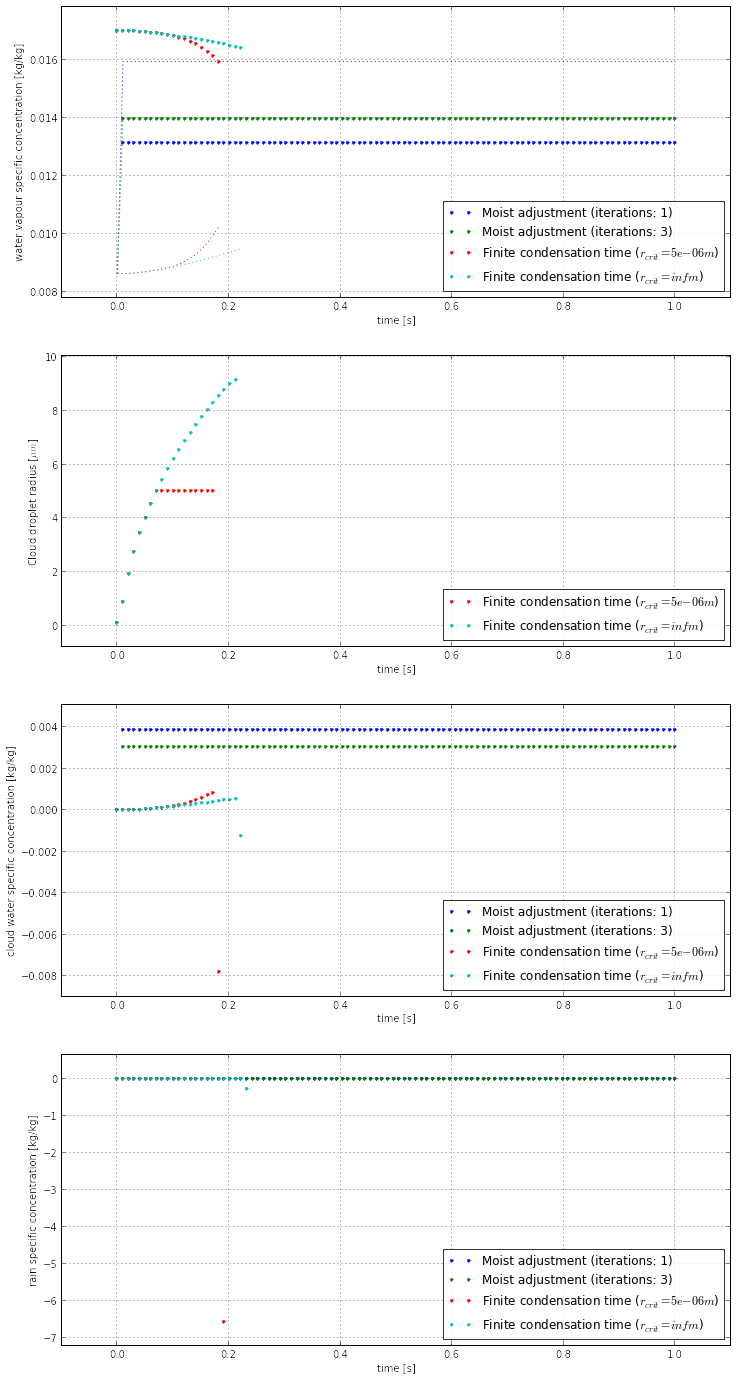

In [3]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 0.017
initial_condition[Var.T] = 285.
p0 = 101325.1  # [Pa]

t_ = np.linspace(0., 1., 100)

SolverClass = odespy.Euler

microphysics_model = cloud_microphysics.MoistAdjustmentMicrophysics()
sol = microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0)
sol1 = microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0, iterations=3)
sol2 = cloud_microphysics.FiniteCondensationTimeMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass)
sol3 = cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=6e-6).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass)
sol3 = cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=np.inf).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass)

#sol2.plot()
plot_hydrometeor_evolution([sol, sol1, sol2, sol3], variables=['q_v', 'r_c', 'q_l', 'q_r'])